# 클래스 활성화의 히트맵 시각화하기
* Xception 모델 사용
* 컨브넷 시각화

In [3]:
%pip uninstall tensorflow -y


Found existing installation: tensorflow 2.19.0
Uninstalling tensorflow-2.19.0:
  Successfully uninstalled tensorflow-2.19.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.19.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (644.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow as tf
print("CUDA Version:", tf.sysconfig.get_build_info()["cuda_version"])
print("CuDNN Version:", tf.sysconfig.get_build_info()["cudnn_version"])

2025-04-16 10:02:36.290066: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-16 10:02:36.300546: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744765356.311643   49206 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744765356.314937   49206 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744765356.323856   49206 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

CUDA Version: 12.5.1
CuDNN Version: 9


In [15]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)  # 점진적 할당 허용
    except RuntimeError as e:
        print(e)


Physical devices cannot be modified after being initialized


In [11]:
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers
import matplotlib.pyplot as plt
model = keras.applications.xception.Xception(weights="imagenet")

In [12]:
from tensorflow import keras
import numpy as np

def get_img_array(img_path, target_size):
    # Load and preprocess the image
    try:
        img = keras.utils.load_img(img_path, target_size=target_size)
        array = keras.utils.img_to_array(img)
        array = np.expand_dims(array, axis=0)  # Adds a batch dimension
        array = keras.applications.xception.preprocess_input(array)  # Preprocess for Xception
        return array
    except Exception as e:
        print(f"Error while processing the image: {e}")
        return None

# Example usage
img_path = "./etc_data/test.jpg"  # Adjust your local path
target_size = (224, 224)  # Target image size
img_array = get_img_array(img_path, target_size)


In [13]:
img_array = get_img_array(img_path,target_size=(299,299))

In [14]:
# 예측 벡터 디코딩
preds = model.predict(img_array)
print(keras.applications.xception.decode_predictions(preds, top = 3)[0])

E0000 00:00:1744765529.207086   49344 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
E0000 00:00:1744765529.222505   49344 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
2025-04-16 10:05:29.226640: W tensorflow/core/framework/op_kernel.cc:1857] OP_REQUIRES failed at xla_ops.cc:591 : FAILED_PRECONDITION: DNN library initialization failed. Look at the er

FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/hara/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/hara/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/hara/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/hara/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/hara/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/hara/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/hara/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/hara/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/hara/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/hara/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/hara/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/hara/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3077, in run_cell

  File "/home/hara/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3132, in _run_cell

  File "/home/hara/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/hara/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3336, in run_cell_async

  File "/home/hara/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3519, in run_ast_nodes

  File "/home/hara/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3579, in run_code

  File "/tmp/ipykernel_49206/2105161276.py", line 2, in <module>

  File "/home/hara/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/hara/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 560, in predict

  File "/home/hara/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 259, in one_step_on_data_distributed

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_one_step_on_data_distributed_7676]

* megalith : 87%
* stone_wall : 4%
* castle : 1%

In [ ]:
# 이미지넷의 649번 인덱스 megalith에 속한다고 함
np.argmax(preds[0])

649

In [ ]:
# Xception의 모든 합성곱 층 출력
# 마지막 층 : block14_sepcon2
for layer in model.layers:
    if isinstance(layer, (keras.layers.Conv2D, keras.layers.SeparableConv2D)):
        print(layer.name)

block1_conv1
block1_conv2
block2_sepconv1
block2_sepconv2
conv2d
block3_sepconv1
block3_sepconv2
conv2d_1
block4_sepconv1
block4_sepconv2
conv2d_2
block5_sepconv1
block5_sepconv2
block5_sepconv3
block6_sepconv1
block6_sepconv2
block6_sepconv3
block7_sepconv1
block7_sepconv2
block7_sepconv3
block8_sepconv1
block8_sepconv2
block8_sepconv3
block9_sepconv1
block9_sepconv2
block9_sepconv3
block10_sepconv1
block10_sepconv2
block10_sepconv3
block11_sepconv1
block11_sepconv2
block11_sepconv3
block12_sepconv1
block12_sepconv2
block12_sepconv3
block13_sepconv1
block13_sepconv2
conv2d_3
block14_sepconv1
block14_sepconv2


In [10]:
# 마지막 합성곱 출력을 반환하는 모델
# 입력 이미지를 마지막 합성곱 층의 활성화에 매핑하는 모델
last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = [
    "avg_pool",
    "predictions",
]
last_conv_layer = model.get_layer(last_conv_layer_name)
last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

In [12]:
# 마지막 합성곱 층의 활성화는 최종 클래스 예측에 매핑
classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
x= classifier_input

for layer_name in classifier_layer_names:
    x = model.get_layer(layer_name)(x)

classifier_model = keras.Model(classifier_input,x)

In [13]:
# 마지막 합성곱 층의 활성화에 대한 최상위 예측 클래스의 그레이디언트 계산
# 그레디언트 테이프 : 자동 미분 수행-모델 학습 과정에서 파라미터(가중치, 바이어스 등)의 변화에 따른 손실 함수의 변화를 계산하기 위해 사용
import tensorflow as tf

with tf.GradientTape() as tape:
    last_conv_layer_output = last_conv_layer_model(img_array)
    tape.watch(last_conv_layer_output)
    preds = classifier_model(last_conv_layer_output)
    top_pred_index = tf.argmax(preds[0])
    top_class_channel = preds[:, top_pred_index]

grads = tape.gradient(top_class_channel, last_conv_layer_output)

c:\Users\acorn\anaconda3\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 299, 299, 3))
  warnings.warn(msg)


In [ ]:
# 그레디언트 텐서를 평균화
pooled_grads = tf.reduce_mean(grads, axis = (0,1,2)).numpy()
last_conv_layer_output = last_conv_layer_output.numpy()[0]
for i in range(pooled_grads.shape[-1]):
    last_conv_layer_output[:,:,i] *= pooled_grads[i]


# 만들어진 특성 맵을 채널별로 평균
heatmap = np.mean(last_conv_layer_output,axis = -1)


AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

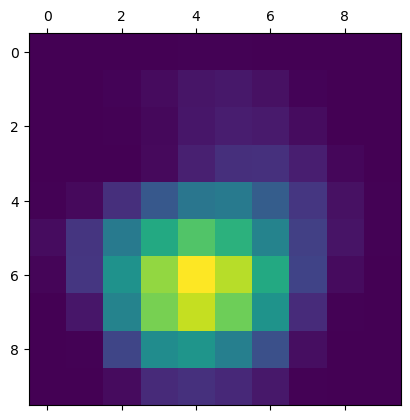

In [19]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

C:\Users\acorn\AppData\Local\Temp\ipykernel_5664\3028414739.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jet = cm.get_cmap("jet")


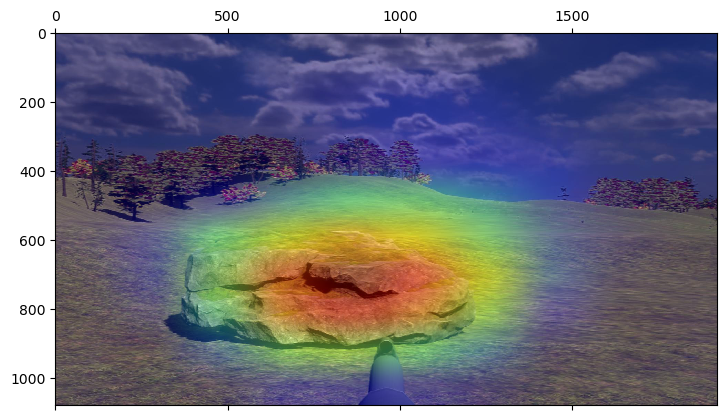

In [20]:
import matplotlib.cm as cm

img = keras.utils.load_img(img_path)
img = keras.utils.img_to_array(img)
heatmap = np.uint8(255*heatmap)

jet = cm.get_cmap("jet")
jet_colors = jet(np.arange(256))[:,:3]
jet_heatmap = jet_colors[heatmap]

jet_heatmap = keras.utils.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.utils.img_to_array(jet_heatmap)

superimposed_img = jet_heatmap*0.4+img
superimposed_img = keras.utils.array_to_img(superimposed_img)

save_path = "heatmap_rock.jpg"
superimposed_img.save(save_path)
plt.matshow(superimposed_img)
plt.show()